# Proyecto 3: Predicción de precios de propiedades

¡Bienvenidos al tercer proyecto de la carrera de Data Science de Acamica! 

En este proyecto vamos a seguir trabajando con el dataset de propiedades en venta publicadas en el portal [Properati](www.properati.com.ar). El objetivo en este caso armar nuestros primeros modelos para predecir el precio de las propiedades en dólares.

Las columnas que se agregan son:

* `barrios_match`: si coincide el barrio publicado con el geográfico vale 1, si no 0.

* `PH`, `apartment`, `house`: variables binarias que indican el tipo de propiedad.

* dummies de barrios: variables binarias con 1 o 0 según el barrio.

La métrica que vamos a usar para medir es RMSE (raíz del error cuadrático medio), cuya fórmula es:

$$RMSE = \sqrt{\frac{\sum_{t=1}^n (\hat y_t - y_t)^2}{n}}$$

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.float_format', lambda x: '%.3f' % x)
path_dataset = 'dataset/datos_properati_limpios_model.csv'
df = pd.read_csv(path_dataset)

In [2]:
print("El dataset que vamos a trabajar aquí tiene {} observaciones".format(df.shape[0]))

El dataset que vamos a trabajar aquí tiene 6376 observaciones


El objetivo de este proyecto es poder trabajar en el ajuste de modelos y su posterior evaluación.

Para empezar vamos a separar el `dataset` en un conjunto de entrenamiento (80%) y un conjunto de test (20%). 

**Separá el dataset** en `X_train`, `X_test`, `y_train` e `y_test` con el tamaño correspondiente

In [3]:
X = df.drop(['price_aprox_usd'], axis=1)
y = df['price_aprox_usd']

# Realizá la separación a continuación en esta celda
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Árboles de decisión

Lo primero que vamos a hacer es entrenar un árbol de decisión y usar de métrica al `RMSE`. 

Para poder obtener el **RMSE** vamos a medir el `mean_squared_error` y obtener su raíz cuadrada. 

**Importá** `DecisionTreeRegressor` desde `sklearn.tree`.  

A continuación **entrená** el regresor con el conjunto de training


In [4]:
# En esta celda cargá el regresor y realizá el entrenamiento
from sklearn.tree import DecisionTreeRegressor 
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

Con el modelo entrenado **realizá la predicción** sobre el conjunto de test `X_test` y guardá el resultado en una variable `y_pred`.

In [5]:
# Acá realizá la predicción
y_pred = tree_reg.predict(X_test)

**Calculá el rmse** sacando la raíz cuadrada de `mean_squared_error` entre `y_test` e `y_pred` y **mostrá** el resultado

In [6]:
# En esta celda calculá el rmse
from sklearn.metrics import mean_squared_error
tree_mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(tree_mse)
rmse

25536.918364036763

__Analizar el cambio en el RMSE a medida que es más profundo el árbol de decisión, tanto en training como en testing.__

Para esto, **iterá** de 5 en 5 en el parámetro `max_depth` y **observá** como impacta en el RMSE. 

**Creá** dos arreglos `rmses_train` y `rmses_test` para ir guardando los **rmse** de cada profundidad

Ahora graficamos los valores que guardamos en los arreglos `rmses_train` y `rmses_test`

In [7]:
cases = [1,5,10,15,20,25]
rmses_test = []
for case in cases:
    tree_reg_tst = DecisionTreeRegressor(max_depth=case)
    tree_reg_tst.fit(X_train, y_train)
    y_pred_tst = tree_reg_tst.predict(X_test)
    tree_mse_tst = mean_squared_error(y_test, y_pred_tst)
    rmse_tst = np.sqrt(tree_mse_tst)
    rmses_test.append(rmse_tst)

In [8]:
cases_tn = [1,5,10,15,20,25]
rmses_train = []
for case in cases_tn:
    tree_reg_tn = DecisionTreeRegressor(max_depth=case)
    tree_reg_tn.fit(X_train, y_train)
    y_pred_tn = tree_reg_tn.predict(X_train)
    tree_mse_tn = mean_squared_error(y_train, y_pred_tn)
    rmse_tn = np.sqrt(tree_mse_tn)
    rmses_train.append(rmse_tn)

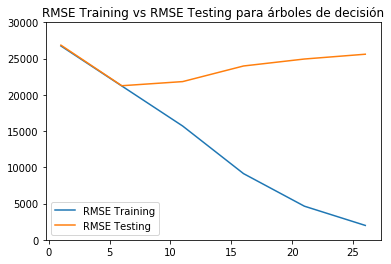

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.plot(range(1,30, 5), rmses_train, label='RMSE Training')
plt.plot(range(1,30, 5), rmses_test, label='RMSE Testing')
plt.ylim((0, 30000))
plt.legend(loc="best")
plt.title("RMSE Training vs RMSE Testing para árboles de decisión")
plt.show()

Podemos ver aquí como el modelo presenta sobreajuste dado que a mayor complejidad (en este caso, mayor profundidad del árbol) más diferencia entre los resultados de training y testing. También observamos como la curva de testing decrece y luego vuelvo a crecer. El punto donde se minimiza está relacionado con el tradeoff entre sesgo y varianza que vamos a ver en la próxima unidad.

## KNN

**Entrená un knn** y nuevamente medir el **rmse** en el conjunto de testing


In [10]:
# Realizá el entrenamiento y el cálculo de rmse en esta celda
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
knn_mse = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(knn_mse)
rmse_knn


23071.204251446437

__Analizar el cambio en el RMSE a medida que consideramos más vecinos para KNN, tanto en training como en testing.__

Para esto, **iterá** incrementando de a uno el parámetro `n_neighbors` y **observá** como impacta en el RMSE. 

**Creá** dos arreglos `rmses_train` y `rmses_test` para ir guardando los **rmse** de cada profundidad

In [11]:
# Calculá los cambio en el rmse en esta celda
cases_knn_tst = list(range(1,30))
rmses_test = []
for case in cases_knn_tst:
    knn_reg_tst = KNeighborsRegressor(n_neighbors=case)
    knn_reg_tst.fit(X_train, y_train)
    y_pred_knn_tst = knn_reg_tst.predict(X_test)
    knn_mse_tst = mean_squared_error(y_test, y_pred_knn_tst)
    rmse_knn_tst = np.sqrt(knn_mse_tst)
    rmses_test.append(rmse_knn_tst)

In [12]:
cases_knn_trn = list(range(1,30))
rmses_train = []
for case in cases_knn_trn:
    knn_reg_trn = KNeighborsRegressor(n_neighbors=case)
    knn_reg_trn.fit(X_train, y_train)
    y_pred_knn_trn = knn_reg_trn.predict(X_train)
    knn_mse_trn = mean_squared_error(y_train, y_pred_knn_trn)
    rmse_knn_trn = np.sqrt(knn_mse_trn)
    rmses_train.append(rmse_knn_trn)


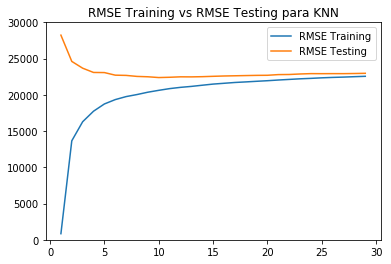

In [13]:
plt.plot(range(1,30, 1), rmses_train, label='RMSE Training')
plt.plot(range(1,30, 1), rmses_test, label='RMSE Testing')
plt.ylim((0, 30000))
plt.legend(loc="best")
plt.title("RMSE Training vs RMSE Testing para KNN")
plt.show()

**Calcular el RMSE promedio del resultado de cross validation para un árbol de decisión. 
Como parámetros deberás usar:**
- 10 folds
- profundidad 5
- scoring neg_mean_squared_error.

El árbol de decisión guardalo en una variable llamada `regressor` para poder reutilizarla luego.

Atención: `cross_validation_score` de `scikit-learn` usá la métrica `neg_mean_squared_error` (NMSE) en vez de `mean_square_error` (MSE). 

`NMSE` es lo mismo que `MSE` pero con un signo negativo. 

Como nosotros queremos obtener el `MSE` para calcular sobre él el `RMSE`, vamos a definir un método `nmsq2rmse` para hacer esa conversión de `NMSE` a `MSE`
.

In [14]:
def nmsq2rmse(score):
    return np.sqrt(-score)

In [15]:
# Calculá en esta celda los cross_val_score
regressor = DecisionTreeRegressor()
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, X_train, y_train,
                             scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
print("Scores: ", rmse_scores)
print("Promedio: ", rmse_scores.mean())
print("Desvío estandar: ", rmse_scores.std())

Scores:  [24602.17723243 24909.80653311 25701.61978362 27316.49694362
 25371.71807635 25393.72417239 26480.15862715 25510.84956869
 26919.91378388 27208.38994235]
Promedio:  25941.48546635858
Desvío estandar:  920.2696541417307


Para ver el resultado final, reentrenamos al regresor y mostramos en un dataframe la comparación entre los valores reales, los predichos y su diferencia

In [16]:
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
val_real = pd.Series(y_test.values)
val_pred = pd.Series(y_pred)

In [17]:
predicciones = pd.concat([val_real.rename('Valor real'),val_pred.rename('Valor Pred') ,abs(val_real-val_pred).rename('Dif(+/-)')] ,  axis=1)

In [18]:
predicciones.head(10)

,Valor real,Valor Pred,Dif(+/-)
0,148000.000,140000.000,8000.000
1,88000.000,130000.000,42000.000
2,165000.000,120000.000,45000.000
3,113000.000,135000.000,22000.000
4,140000.000,121000.000,19000.000
5,80000.000,74000.000,6000.000
6,105000.000,109500.000,4500.000
7,137000.000,99000.000,38000.000
8,115000.000,85000.000,30000.000
9,80000.000,83000.000,3000.000


In [19]:
import seaborn as sns
dif_val = val_real - val_pred

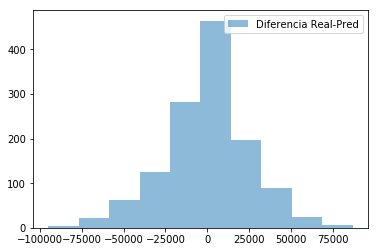

In [20]:
plt.hist(dif_val, alpha=0.5, label='Diferencia Real-Pred')
plt.legend(loc="upper right")
plt.xlabel("")
plt.show()


C:\Users\Javi\Anaconda3\envs\ds\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


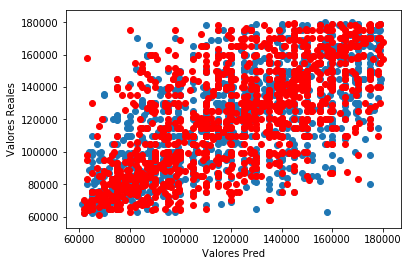

In [21]:
fig,ax = plt.subplots()
plt.scatter(val_pred, val_real)
plt.scatter(val_real, val_pred, color="red")
ax.set_xlabel('Valores Pred')
ax.set_ylabel('Valores Reales')
fig.show()

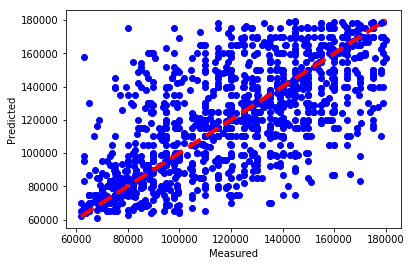

In [22]:
#PREDICTION ERROR PLOT
plt.scatter(val_real, val_pred, c="blue")
plt.plot([val_real.min(), val_real.max()], [val_real.min(), val_real.max()], 'k--', lw=4, c='red')
plt.ylabel('Predicted')
plt.xlabel('Measured')
plt.show()

Text(0, 0.5, 'Dif +/-')

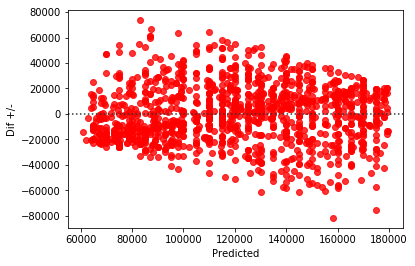

In [23]:
#RESIDUAL PLOT
sns.residplot(val_pred, dif_val, color="red")
plt.xlabel("Predicted")
plt.ylabel("Dif +/-")